Test for adding incomes
All incomes:
[{'income_id': 1, 'source': 'salary', 'amount': 3000.0, 'date': '2025-11-01'}, {'income_id': 2, 'source': 'freelance', 'amount': 800.0, 'date': '2025-11-10'}, {'income_id': 3, 'source': 'salary', 'amount': 3100.0, 'date': '2025-12-01'}, {'income_id': 4, 'source': 'salary', 'amount': 3000.0, 'date': '2025-11-01'}, {'income_id': 5, 'source': 'freelance', 'amount': 800.0, 'date': '2025-11-10'}, {'income_id': 6, 'source': 'salary', 'amount': 3100.0, 'date': '2025-12-01'}]

Total income in 2025-11:
7600.0

Average monthly income:
6900.0

Income by source:
{'salary': 12200.0, 'freelance': 1600.0}

Test for adding expenses
All expenses:
[{'amount': 200.0, 'date': '2025-11-02', 'description': 'grocery shopping', 'category': 'food', 'tags': [], 'expense_id': 1}, {'amount': 1200.0, 'date': '2025-11-03', 'description': 'apartment rent', 'category': 'rent', 'tags': [], 'expense_id': 2}, {'amount': 150.0, 'date': '2025-12-05', 'description': 'concert ticket', 'c

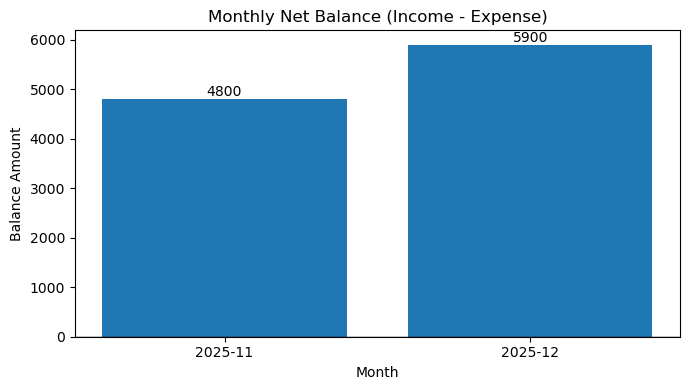

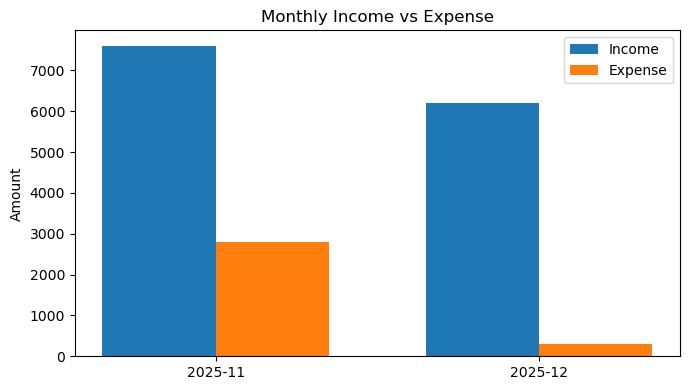

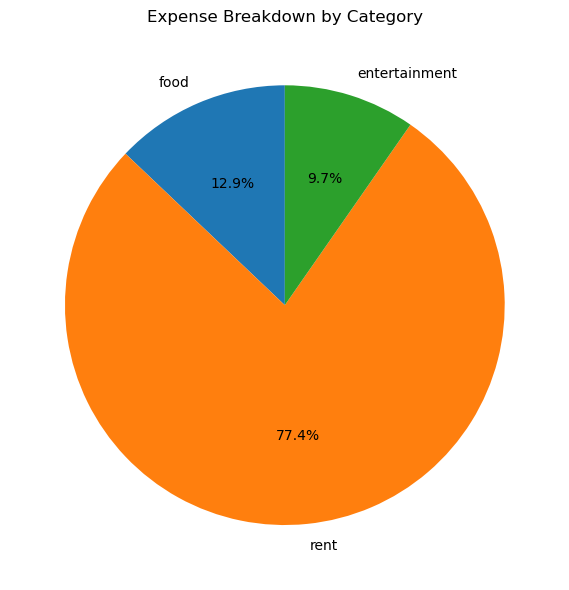

In [3]:
# test_demo_projectstep1.ipynb
# This is a test. I want to make sure all the codes can run 


from budgetmaster.income.entry import (
    add_income,
    get_all_incomes,
)
from budgetmaster.income.summary import (
    total_monthly_income,
    average_monthly_income,
    income_by_source,
)

from budgetmaster.expense.entry import (
    add_expense,
    get_all_expenses,
    total_by_category,
)

from budgetmaster.analysis.reports import (
    monthly_balance,
    savings_rate,
    generate_report,
    plot_monthly_balance,
    plot_income_vs_expense,
    plot_category_expense,
)

from budgetmaster.analysis.utils import (
    format_currency,
    categorize_expense,
)



def main():
    # 1. check add incomes can work 
    print("Test for adding incomes")
    add_income("salary", 3000, "2025-11-01")
    add_income("freelance", 800, "2025-11-10")
    add_income("salary", 3100, "2025-12-01")

    all_incomes = get_all_incomes()
    print("All incomes:")
    print(all_incomes)
    print()

    print("Total income in 2025-11:")
    print(total_monthly_income("2025-11"))
    print()

    print("Average monthly income:")
    print(average_monthly_income())
    print()

    print("Income by source:")
    print(income_by_source())
    print()


    # 2. check add expenses can work 
    print("Test for adding expenses")
    add_expense("food", 200, "2025-11-02", "grocery shopping")
    add_expense("rent", 1200, "2025-11-03", "apartment rent")
    add_expense("entertainment", 150, "2025-12-05", "concert ticket")

    all_expenses = get_all_expenses()
    print("All expenses:")
    print(all_expenses)
    print()

    print("Total expense by category:")
    print(total_by_category())
    print()

    # check categorize_expense can work
    example_expense = {
        "amount": 15.0,
        "date": "2025-11-15",
        "description": "coffee at cafe",
    }
    print("Example auto category for:", example_expense)
    print("Guessed category:", categorize_expense(example_expense))
    print()

    # 3. Analysis: monthly balance and savings
    print("Test for Analysis")
    balance = monthly_balance(all_incomes, all_expenses)
    print("Monthly balance (income - expense):")
    print(balance)
    print()

    report_text = generate_report(balance)
    print("Text report:")
    print(report_text)
    print()

    # total income and expenses across all data
    total_income_amount = sum(rec["amount"] for rec in all_incomes)
    total_expense_amount = sum(rec["amount"] for rec in all_expenses)

    rate = savings_rate(total_income_amount, total_expense_amount)
    print("Total income:", format_currency(total_income_amount))
    print("Total expense:", format_currency(total_expense_amount))
    print("Savings rate: {:.2%}".format(rate))

     # 4. check visualizations can work 
    # --------------------------------------------------
    print("Test for visualizations")

    # bar chart of monthly net balance
    plot_monthly_balance(balance)

    # grouped bar chart: income vs expense per month
    plot_income_vs_expense(all_incomes, all_expenses)

    # pie chart of expense by category
    plot_category_expense(all_expenses)



if __name__ == "__main__":
    main()

